In [123]:
from sklearn.model_selection import train_test_split
import pandas as pd



df=pd.read_csv('finalPCA.csv')

X=df.drop(['y'],axis=1)
y=df['y']



x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("x_train.shape:" ,x_train.shape)
print("y_train.shape:" ,y_train.shape)
print("x_test.shape:" ,x_test.shape)
print("y_test.shape:" ,y_test.shape)

x_train.shape: (36168, 18)
y_train.shape: (36168,)
x_test.shape: (9043, 18)
y_test.shape: (9043,)


In [124]:
df.head()

,Unnamed: 0,age,education,balance,day,month,duration,campaign,pdays,previous,y,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
0,0,58,2,2143,5,5,261,1,-1,0,0,1.969508,0.291367,1.114691,0.183420,-0.604762,-0.828776,0.309383,1.723728
1,1,44,1,29,5,5,151,1,-1,0,0,1.531120,0.073696,1.320453,-2.247110,0.942523,-0.072258,-0.377493,-1.644236
2,2,33,1,2,5,5,76,1,-1,0,0,3.168875,-0.476858,-1.869663,1.438016,1.659780,0.160939,-0.038836,0.182354
3,3,47,3,1506,5,5,92,1,-1,0,0,2.812119,-0.016881,1.237860,0.463110,-0.865411,0.068642,-0.777813,0.041188
4,4,33,3,1,5,5,198,1,-1,0,0,-0.073835,2.991254,1.203994,-1.282372,0.628338,1.920010,-1.352203,0.105009


In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(18, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Flatten(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


smote_tomek = SMOTETomek(random_state=42)

X_resampled, y_resampled = smote_tomek.fit_resample(x_train, y_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)
history = model.fit(X_train_scaled, y_resampled, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=32)


loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8349 - loss: 0.3755 - val_accuracy: 0.8222 - val_loss: 0.3909
Epoch 2/100
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8898 - loss: 0.2746 - val_accuracy: 0.8422 - val_loss: 0.3407
Epoch 3/100
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9008 - loss: 0.2528 - val_accuracy: 0.8550 - val_loss: 0.3281
Epoch 4/100
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9065 - loss: 0.2407 - val_accuracy: 0.8546 - val_loss: 0.3149
Epoch 5/100
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9082 - loss: 0.2336 - val_accuracy: 0.8564 - val_loss: 0.3095
Epoch 6/100
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9119 - loss: 0.2270 - val_accuracy: 0.8653 - val_loss: 0.3002
Epoch 7/100
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9140 - loss: 0.2229 - val_accuracy: 0.8597 - val_loss: 0.3067
Epoch 8/100
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9160 - loss: 0

In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test_scaled).round()))

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      7952
           1       0.48      0.79      0.60      1091

    accuracy                           0.87      9043
   macro avg       0.73      0.84      0.76      9043
weighted avg       0.91      0.87      0.89      9043



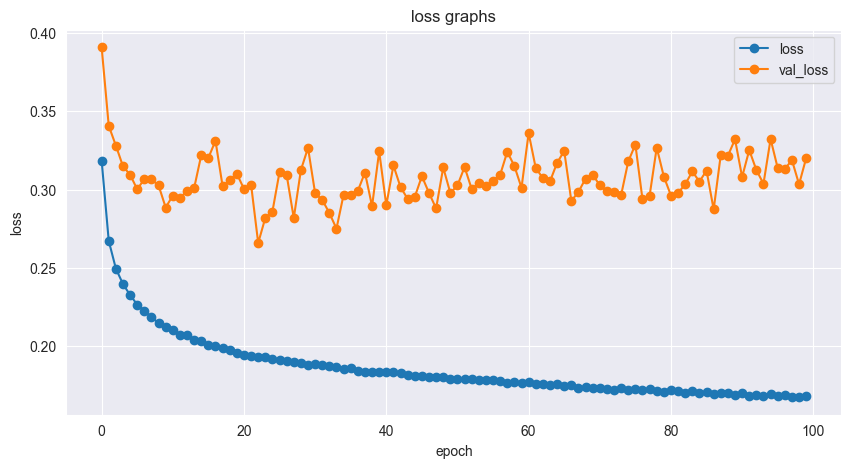

In [127]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='loss', marker='o')
plt.plot(history.history['val_loss'], label='val_loss',marker='o')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title("loss graphs")
plt.legend()
plt.grid(True)
plt.show()

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
model = Sequential([
    Dense(18, input_dim=x_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [115]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
